In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Data Exploration

In [2]:
df = pd.read_csv('C:/Users/Amaan/OneDrive/Documents/csv data/loan_sanction_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

#### Dealing With Null Values in Dataset

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [10]:
df.drop('Loan_ID', axis=1, inplace= True)

#### Summarizing basic statistics (mean, median,standard deviation, etc.) for the numeric columns

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Data Visualization

#### Univariate Analysis

#### Histograms: Plot the frequency distribution of key numeric variables.

In [12]:
numeric_columns = df.select_dtypes('number').columns
numeric_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

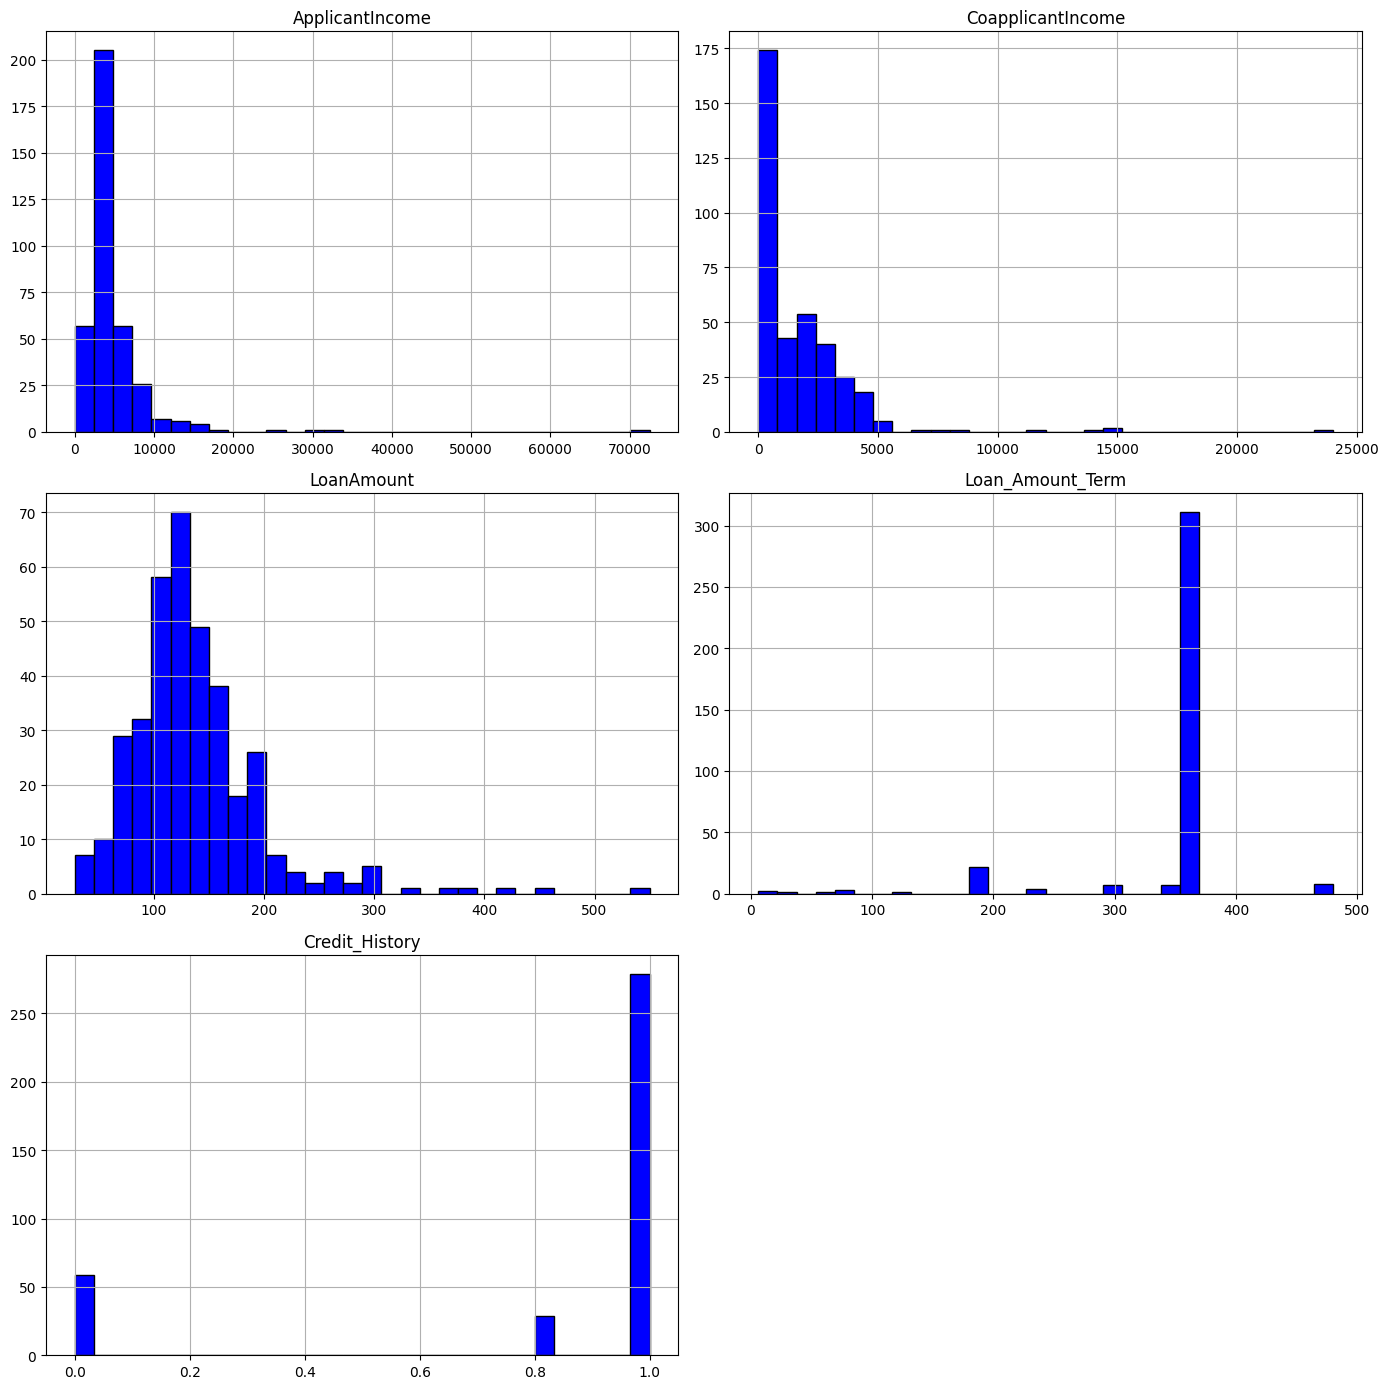

In [13]:
df[numeric_columns].hist(bins=30, figsize=(14,14), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

#### Box Plots: Identify potential outliers and visualize the spread of data.

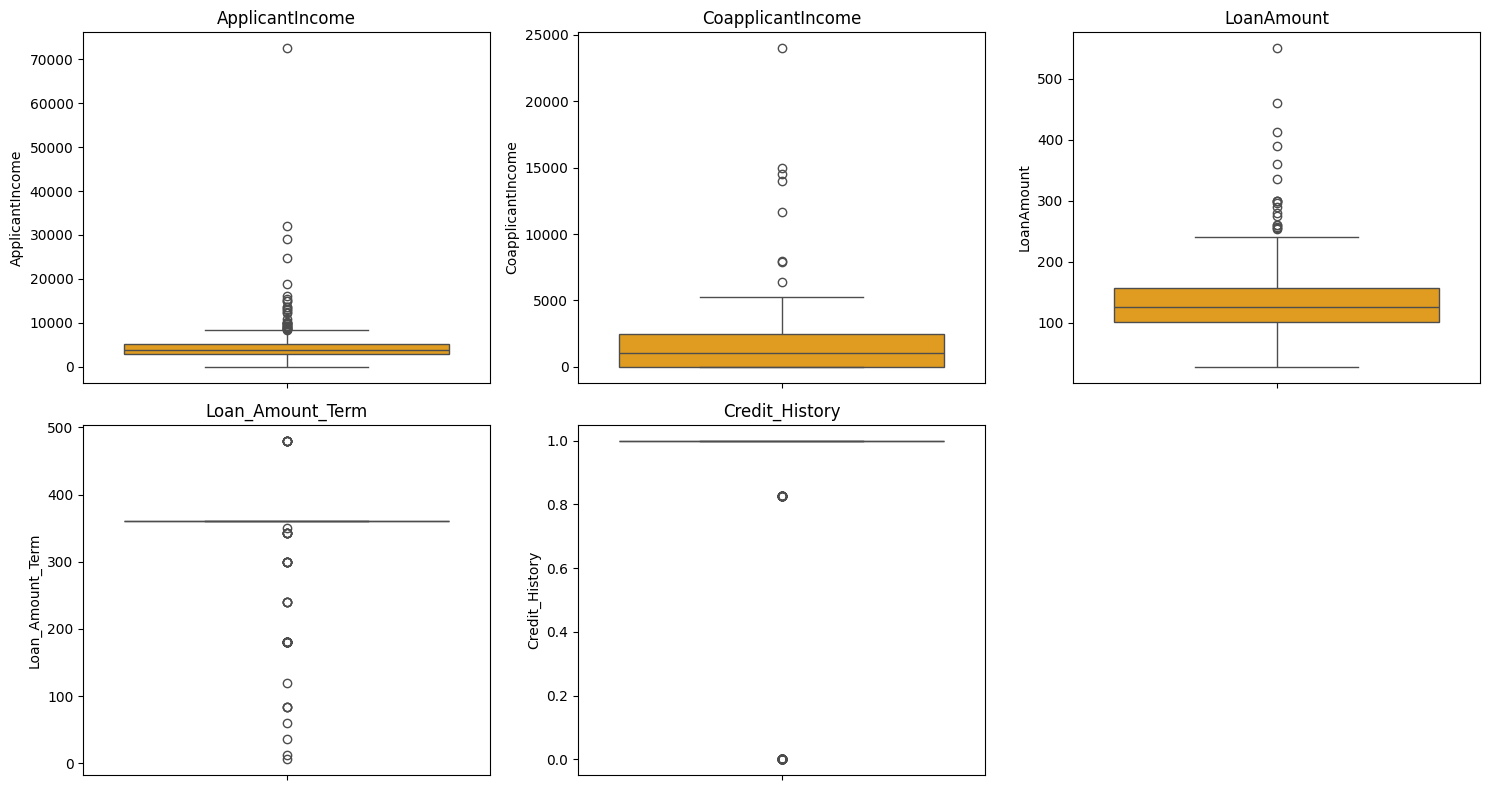

In [14]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
#Analyze categorical variables by creating the following plots:

categorical_columns = df.select_dtypes('object').columns
print(categorical_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


#### Bar Charts: Visualize the frequency distribution of categorical variables.

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\1312816895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='tab20')
C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\1312816895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='tab20')
C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\1312816895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='tab20')
C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\1312816895.py:4: FutureWarning: 

Passing `palette` w

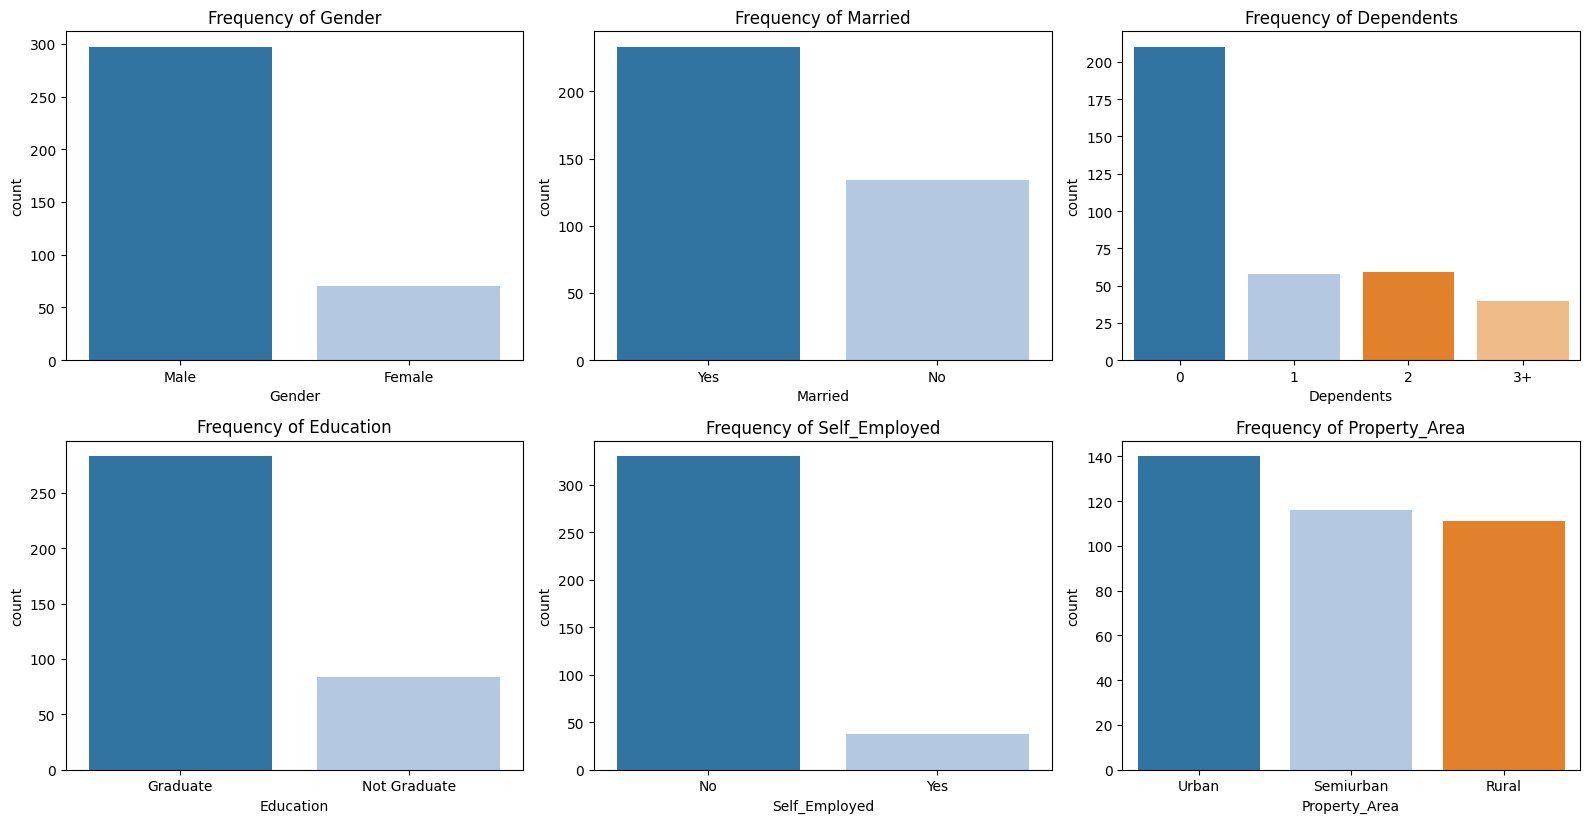

In [16]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='tab20')
    plt.title(f'Frequency of {col}')
    
plt.tight_layout()
plt.show()

#### Pie Charts: Represent the composition of categorical variables.


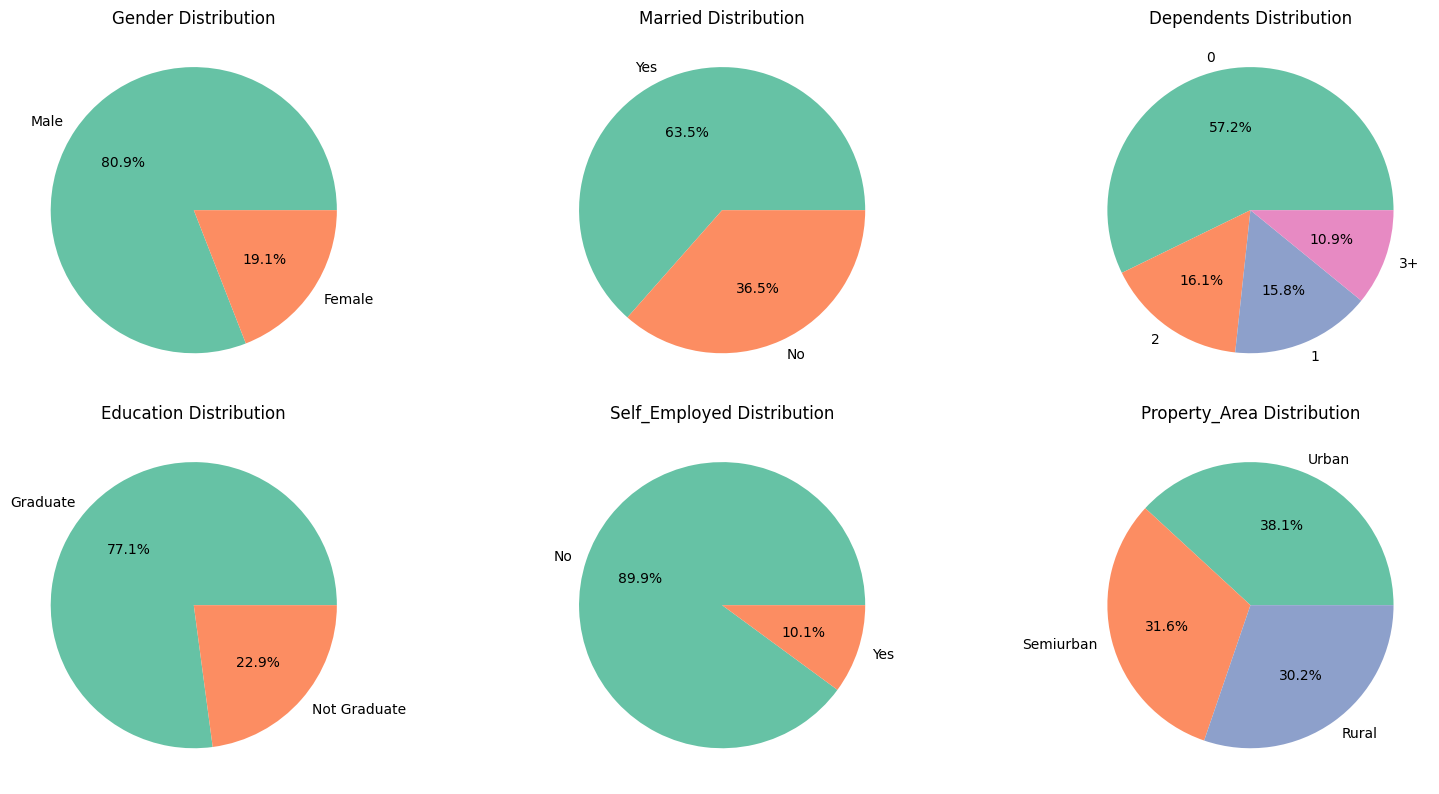

In [17]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    counts = df[col].value_counts()
    plt.pie(counts, labels= counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Create scatter plots to explore relationships between pairs of numeric variables.  

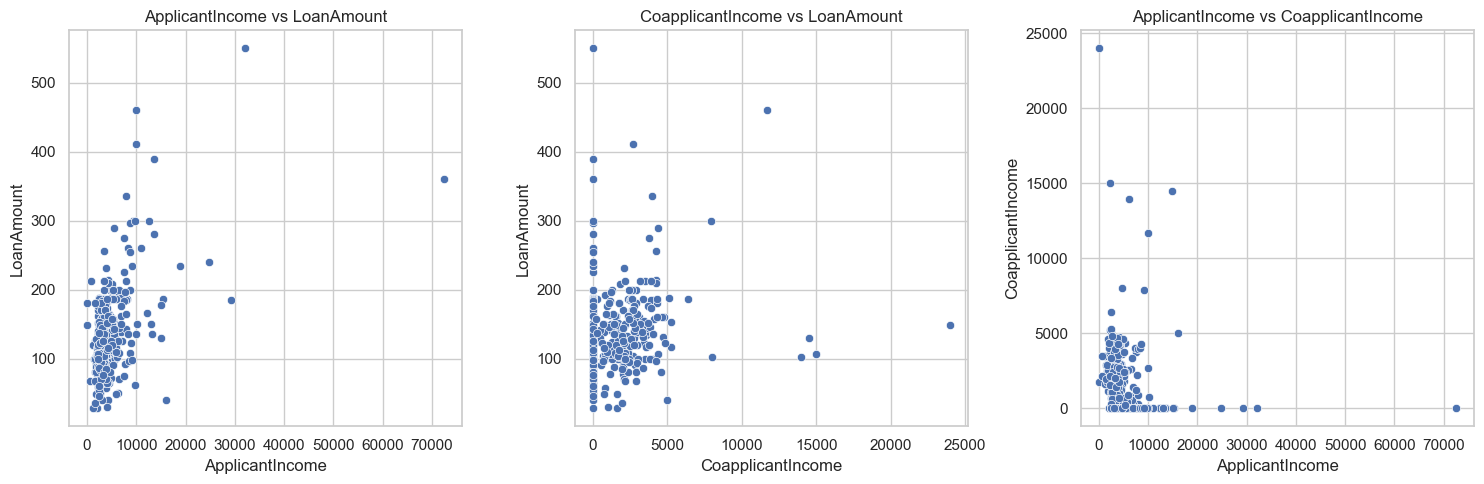

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'])
plt.title('ApplicantIncome vs LoanAmount')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['CoapplicantIncome'], y=df['LoanAmount'])
plt.title('CoapplicantIncome vs LoanAmount')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['ApplicantIncome'], y=df['CoapplicantIncome'])
plt.title('ApplicantIncome vs CoapplicantIncome')

plt.tight_layout()
plt.show()

#### Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously. 

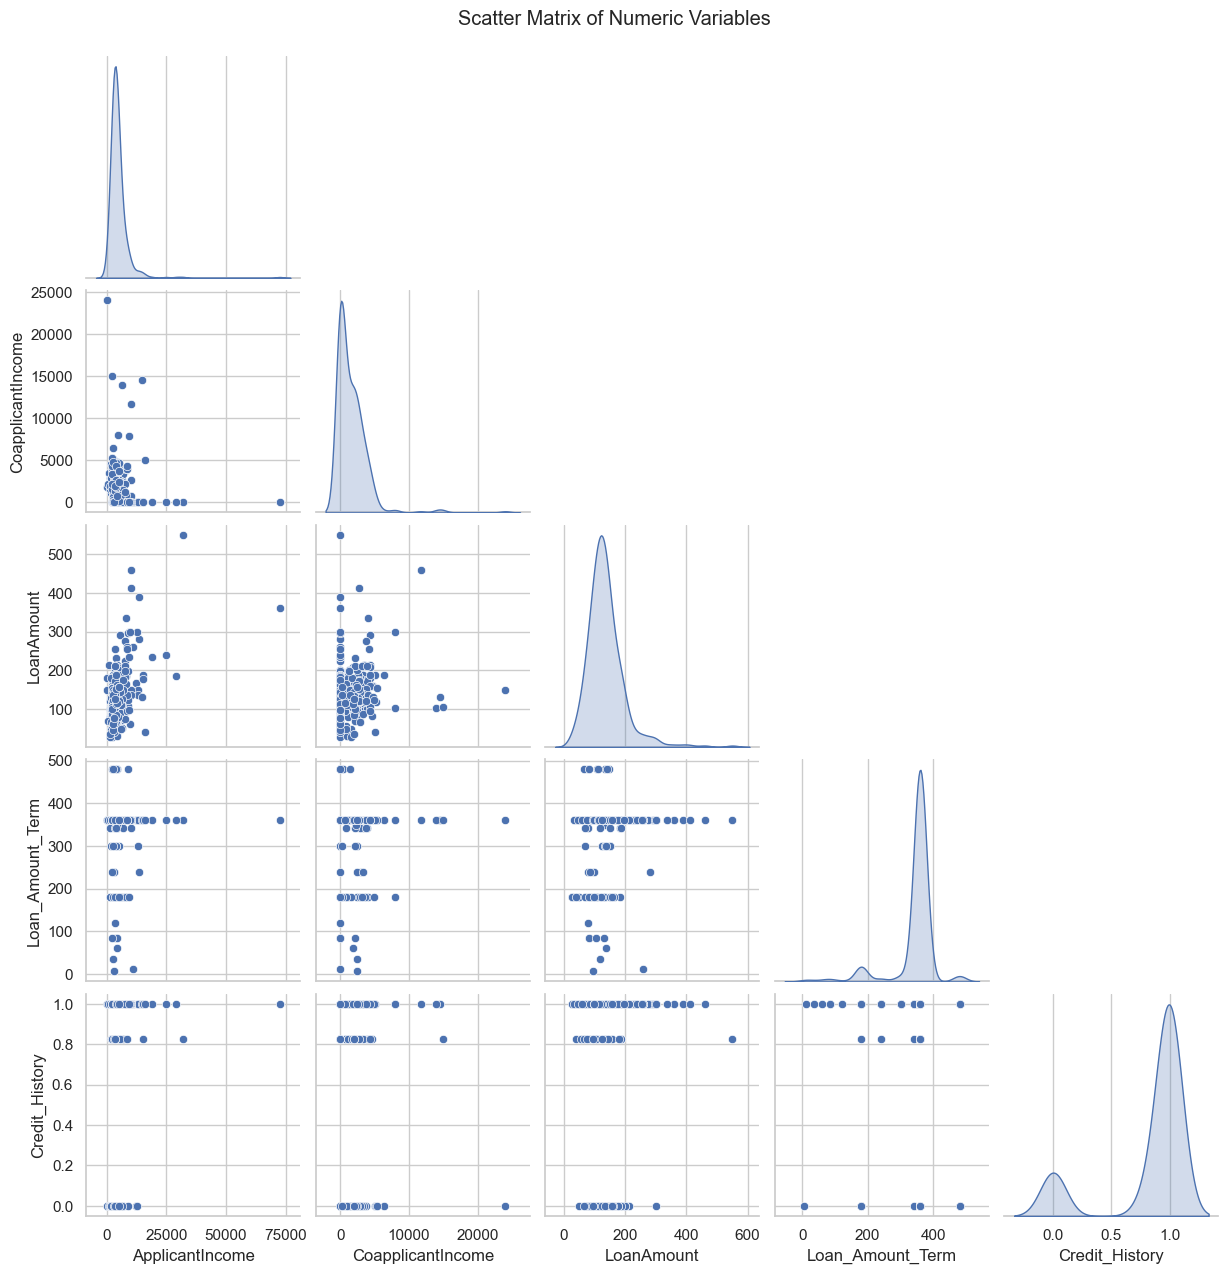

In [19]:
sns.pairplot(df[numeric_columns], corner=True, diag_kind="kde")
plt.suptitle("Scatter Matrix of Numeric Variables", y=1.02)
plt.show()

#### Investigate the relationship between categorical and numeric variables using box plots or violin plots.

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


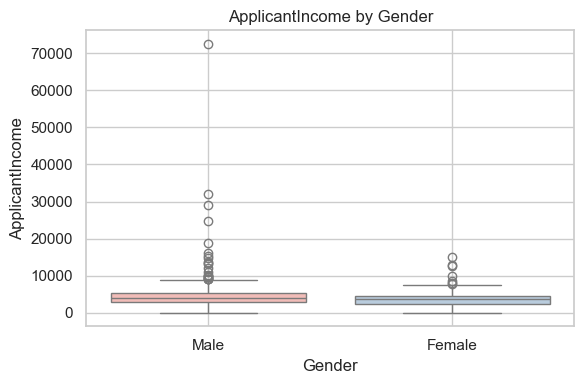

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


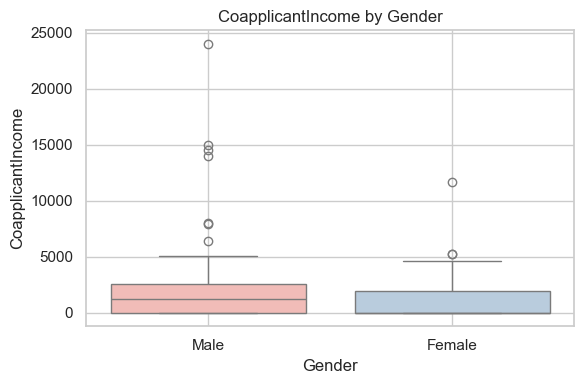

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


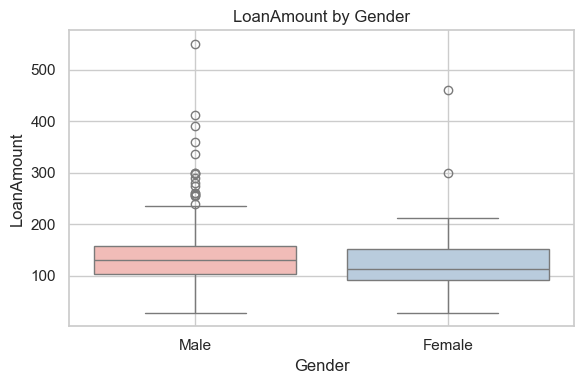

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


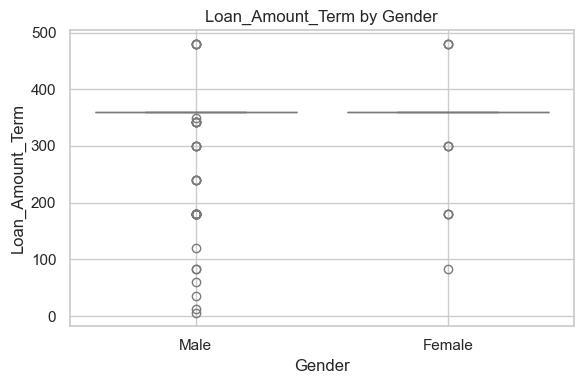

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


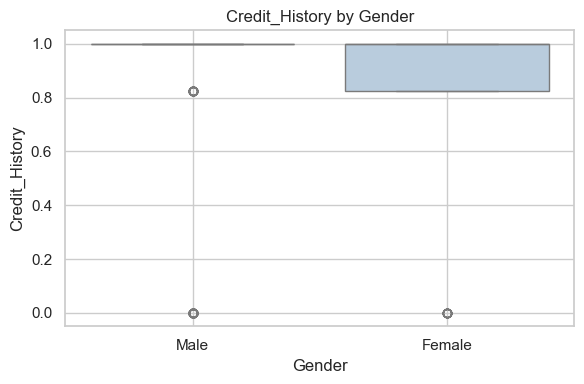

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


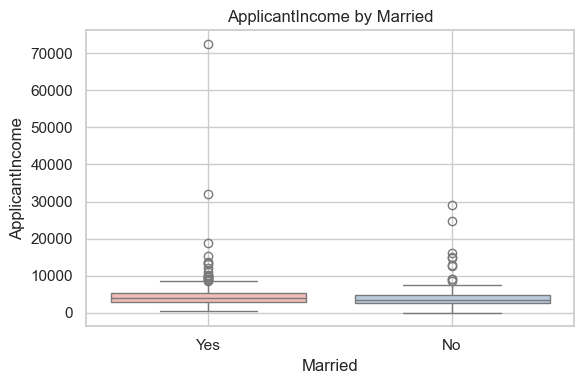

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


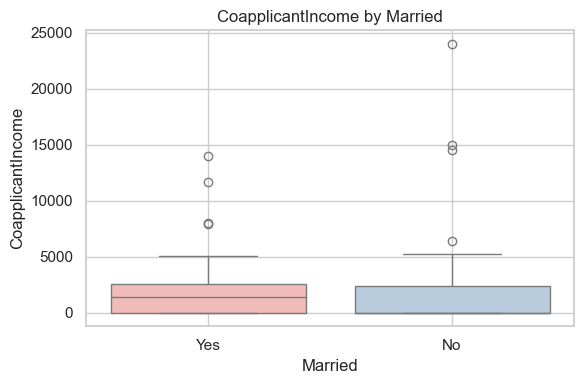

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


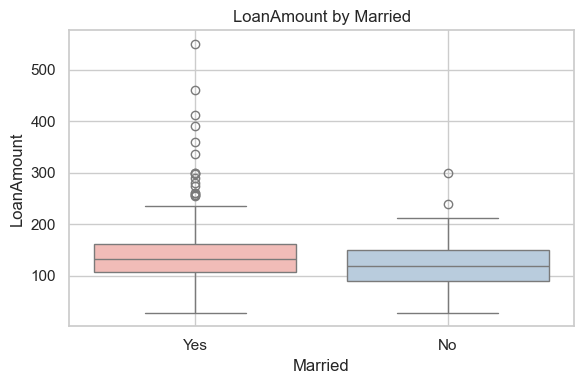

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


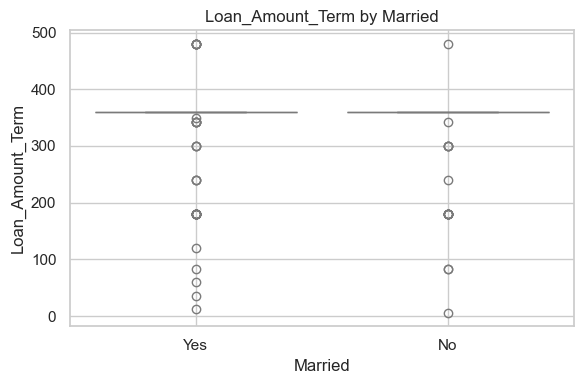

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


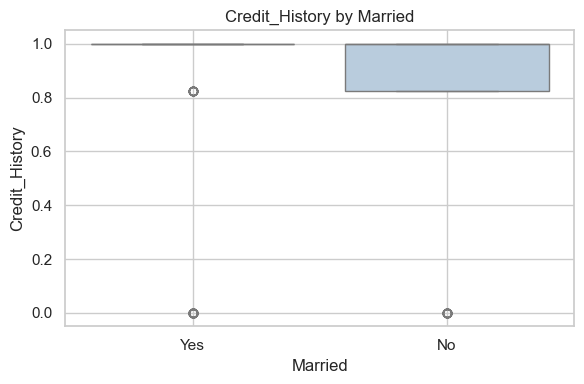

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


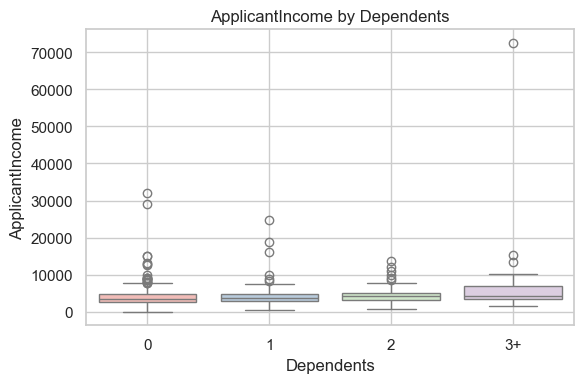

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


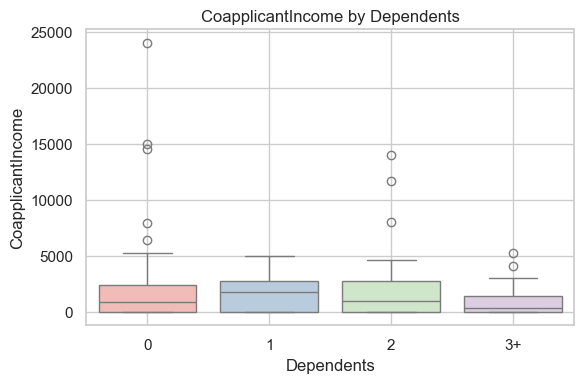

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


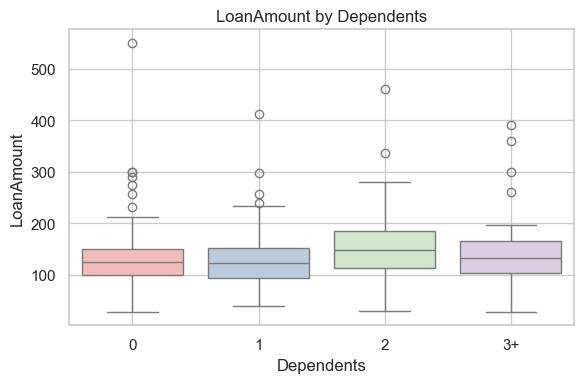

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


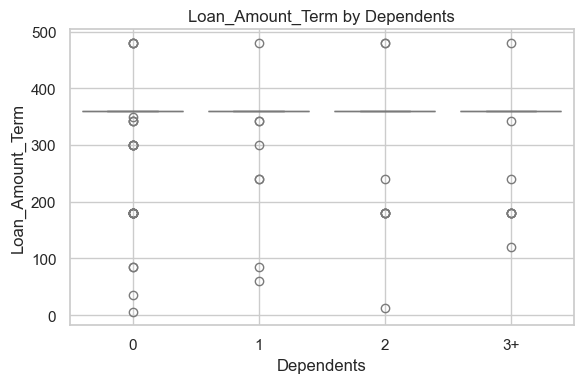

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


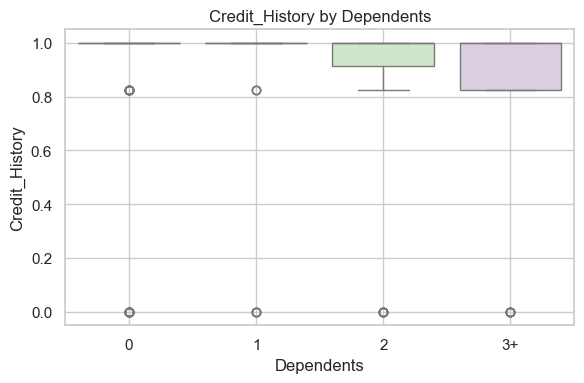

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


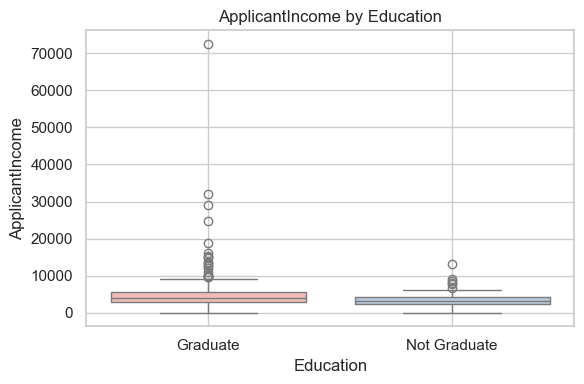

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


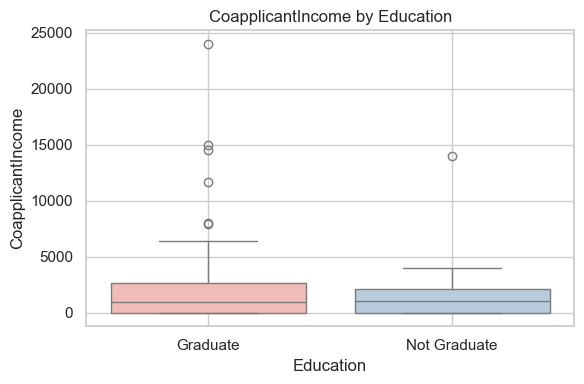

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


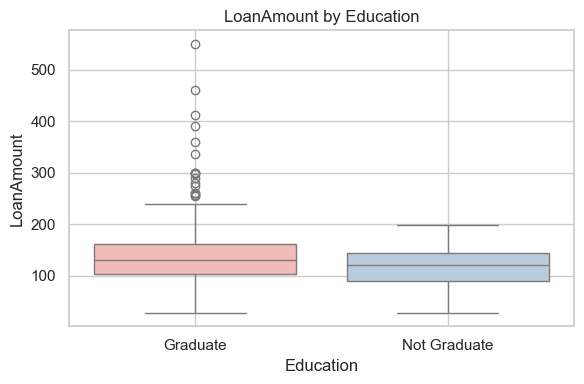

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


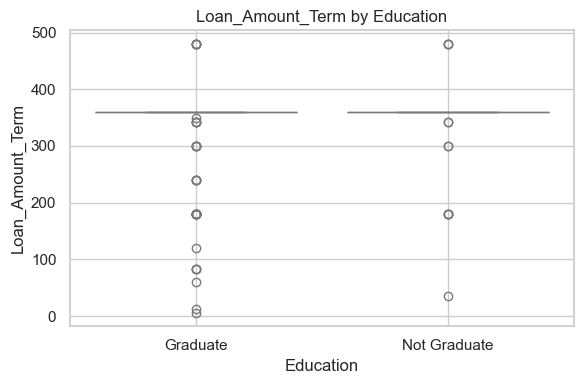

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


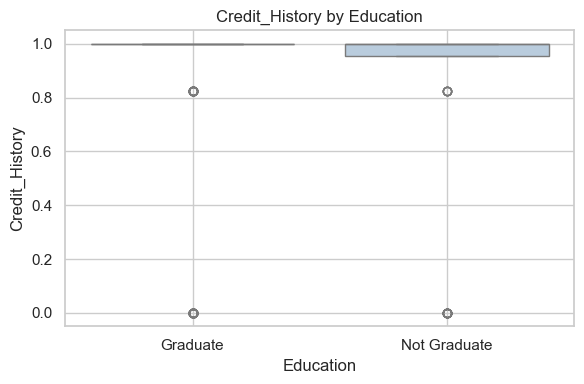

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


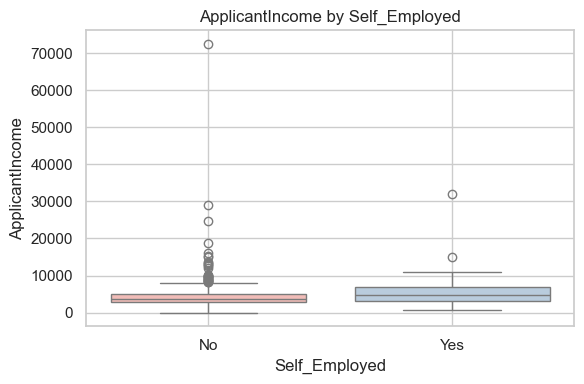

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


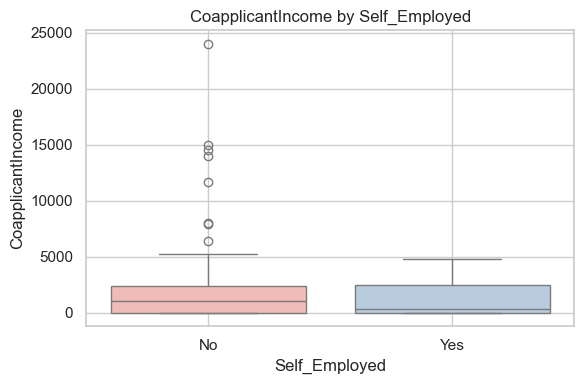

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


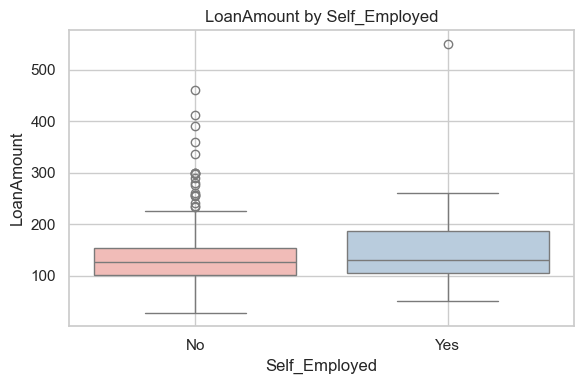

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


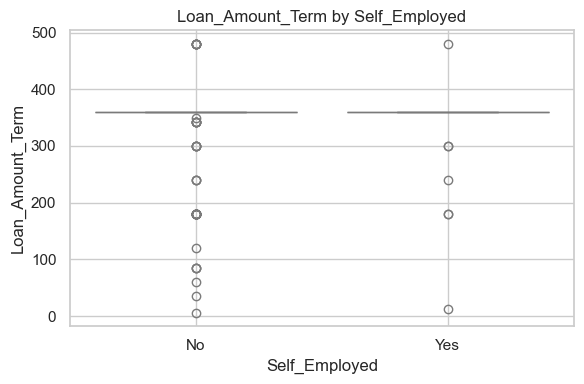

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


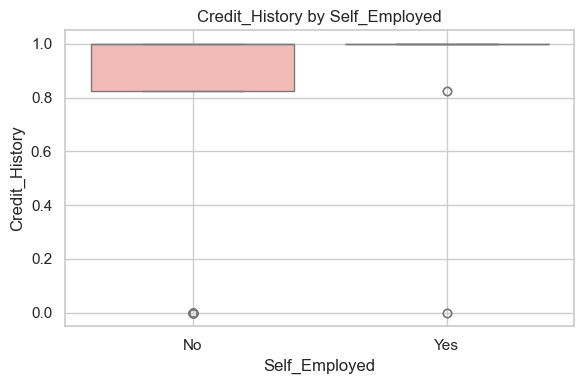

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


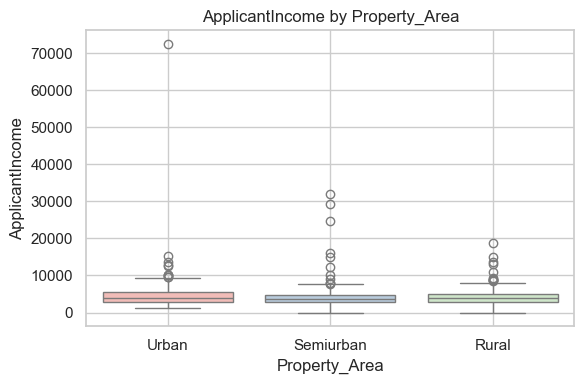

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


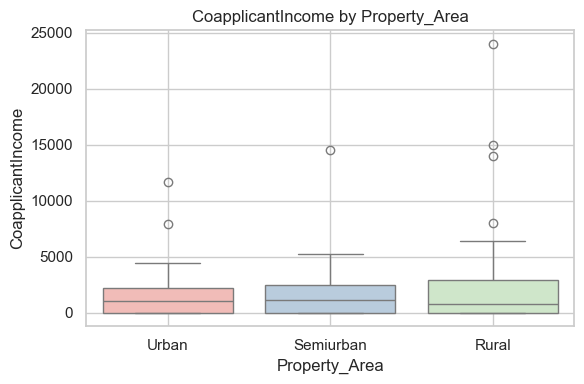

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


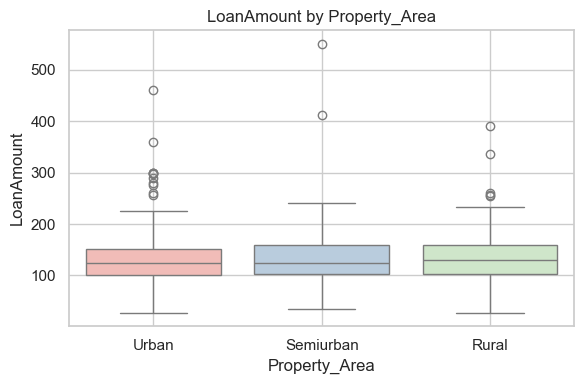

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


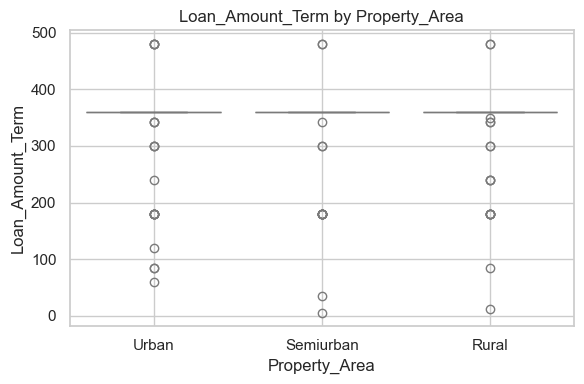

C:\Users\Amaan\AppData\Local\Temp\ipykernel_24840\3483656449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')


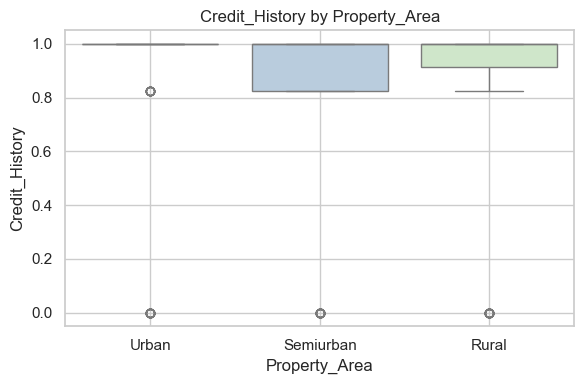

In [20]:
for cat in categorical_columns:
    for num in numeric_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=cat, y=num, palette='Pastel1')
        plt.title(f'{num} by {cat}')
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

### Multivariate Analysis

#### Perform a correlation analysis to identify relationships between numeric variables.

In [21]:
correlation = df[numeric_columns].corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490174,0.023187,0.094083
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.010940,-0.066798
LoanAmount,0.490174,0.150112,1.000000,0.093856,-0.011405
Loan_Amount_Term,0.023187,-0.010940,0.093856,1.000000,-0.052370
Credit_History,0.094083,-0.066798,-0.011405,-0.052370,1.000000


#### Visualize correlations using a heatmap.

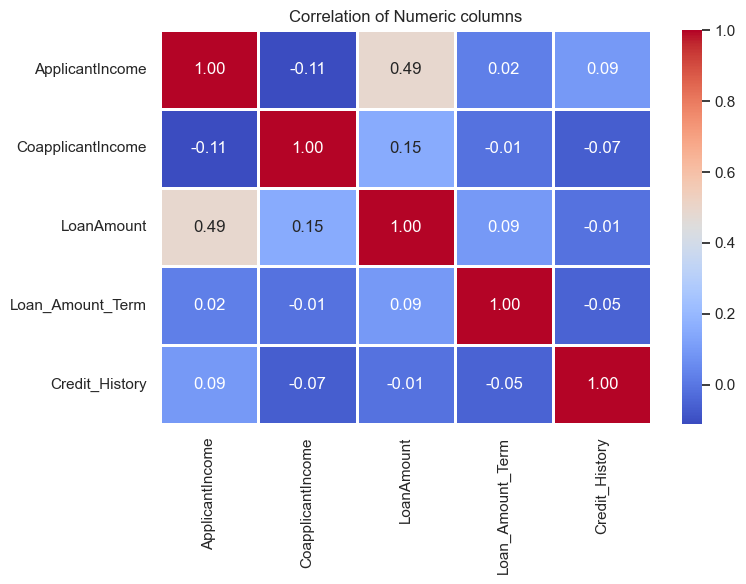

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation of Numeric columns')
plt.tight_layout()
plt.show()

#### Create a stacked bar chart to show the distribution of categorical variables across multiple categories.

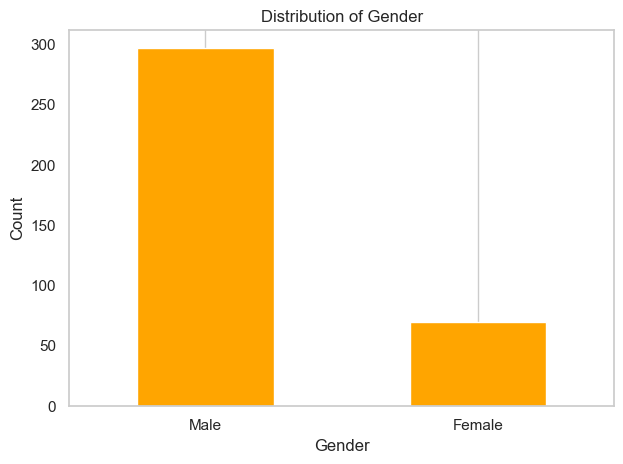

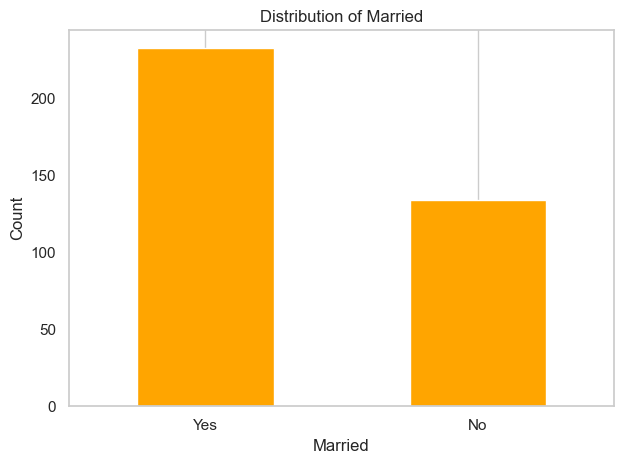

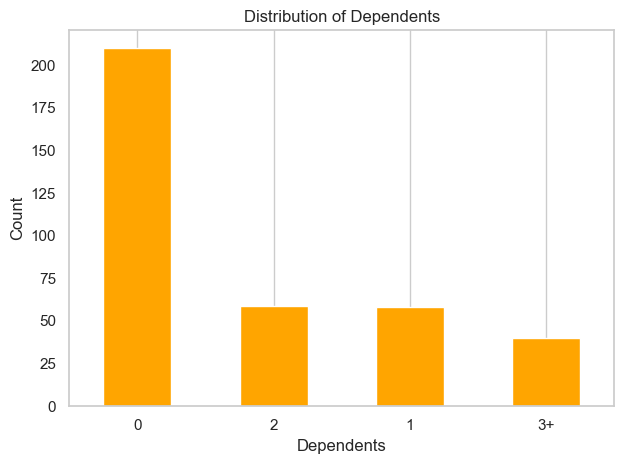

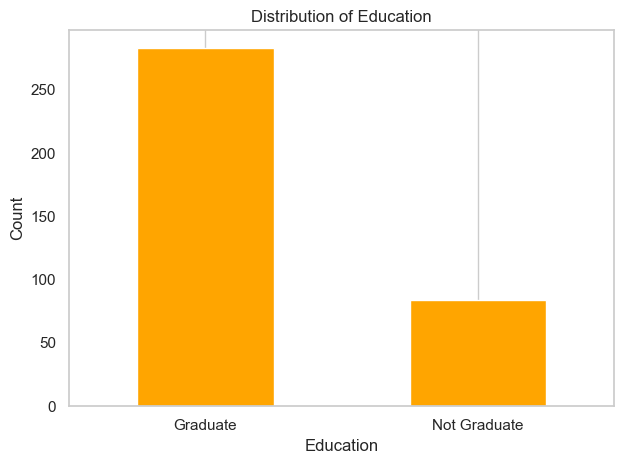

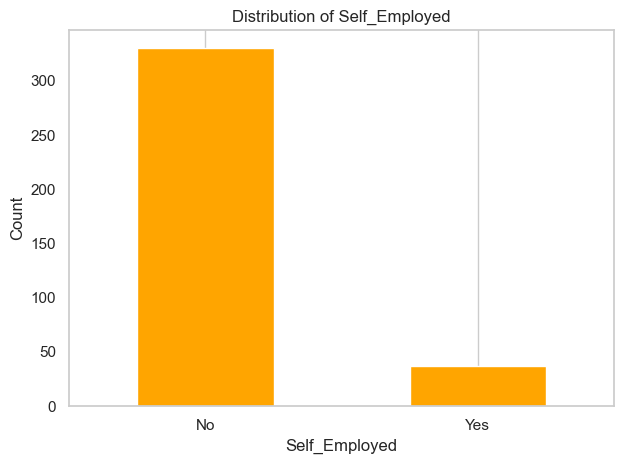

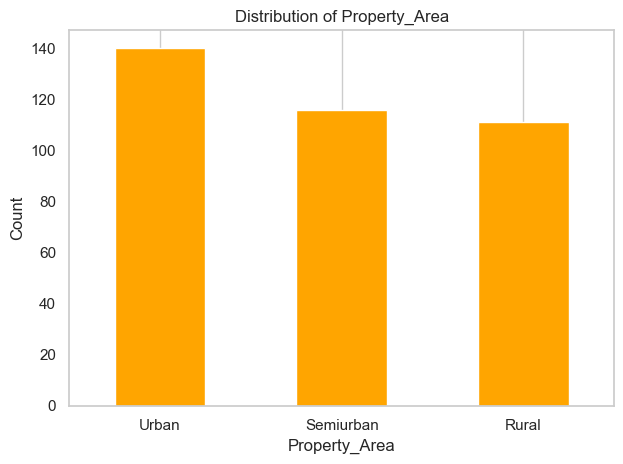

In [23]:
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()